<a href="https://colab.research.google.com/github/Harshh18/Computer-Vision-Practicals/blob/main/Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

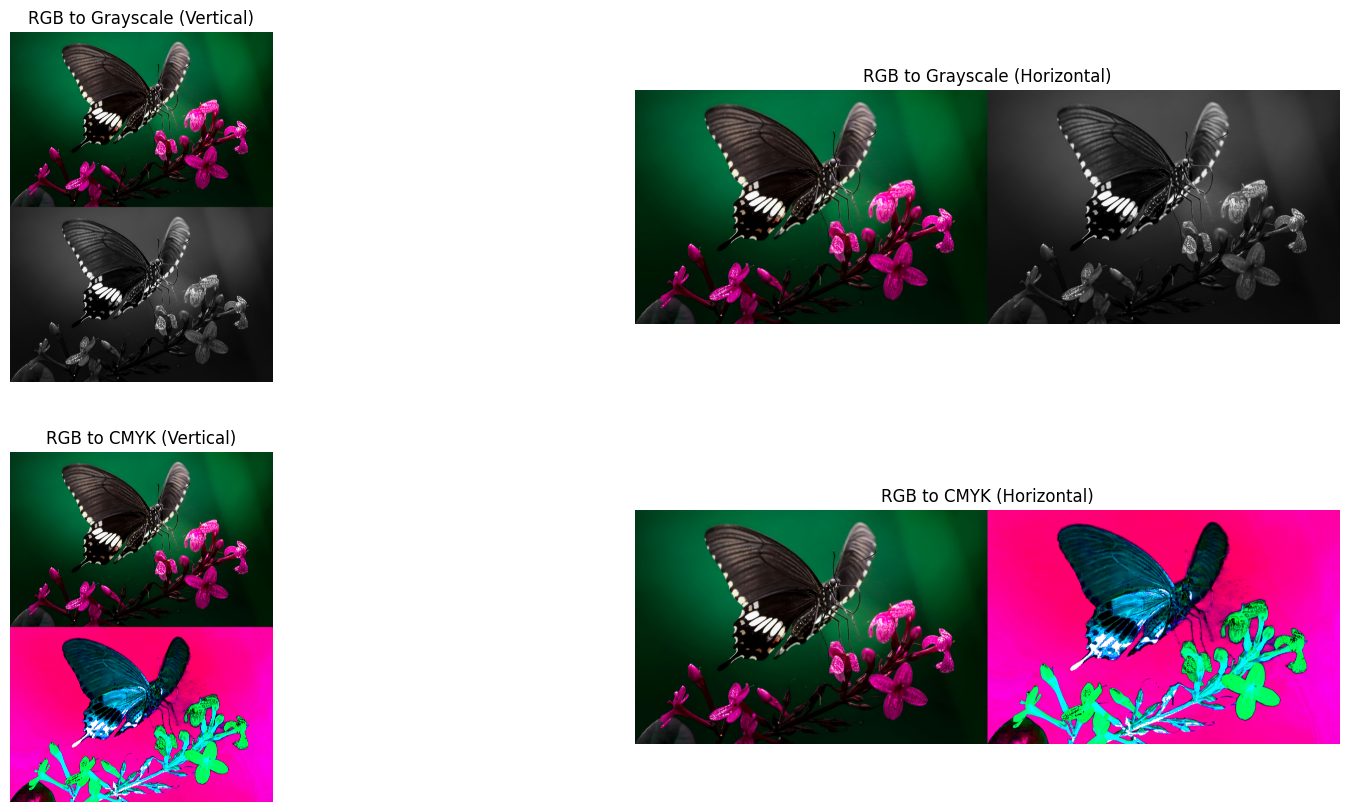

Grayscale (Vertical) Image saved at: output_image_gray_vertical.jpg
Grayscale (Horizontal) Image saved at: output_image_gray_horizontal.jpg
CMYK (Vertical) Image saved at: output_image_cmyk_vertical.jpg
CMYK (Horizontal) Image saved at: output_image_cmyk_horizontal.jpg


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_cmyk(image):

    normalized_rgb = image / 255.0

    K = 1 - np.max(normalized_rgb, axis=2)

    K[K == 1] = 0.999999

    C = (1 - normalized_rgb[:, :, 0] - K) / (1 - K)
    M = (1 - normalized_rgb[:, :, 1] - K) / (1 - K)
    Y = (1 - normalized_rgb[:, :, 2] - K) / (1 - K)


    CMYK = (np.dstack((C, M, Y, K)) * 255).astype(np.uint8)
    return CMYK

image_path = '/content/Butterfly-image.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not open or find the image.")
else:

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert RGB to Grayscale
    image_cmyk = rgb_to_cmyk(image_rgb)  # Convert RGB to CMYK

    image_gray_3channel = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB)
    image_gray_vertical = np.vstack((image_rgb, image_gray_3channel))
    image_gray_horizontal = np.hstack((image_rgb, image_gray_3channel))

    image_cmyk_vertical = np.vstack((image_rgb, image_cmyk[:, :, :3]))
    image_cmyk_horizontal = np.hstack((image_rgb, image_cmyk[:, :, :3]))

    plt.figure(figsize=(20, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(image_gray_vertical)
    plt.title('RGB to Grayscale (Vertical)')
    plt.axis('off')


    plt.subplot(2, 2, 2)
    plt.imshow(image_gray_horizontal)
    plt.title('RGB to Grayscale (Horizontal)')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(image_cmyk_vertical)
    plt.title('RGB to CMYK (Vertical)')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(image_cmyk_horizontal)
    plt.title('RGB to CMYK (Horizontal)')
    plt.axis('off')

    plt.show()


    output_gray_vertical_path = 'output_image_gray_vertical.jpg'
    output_gray_horizontal_path = 'output_image_gray_horizontal.jpg'
    output_cmyk_vertical_path = 'output_image_cmyk_vertical.jpg'
    output_cmyk_horizontal_path = 'output_image_cmyk_horizontal.jpg'

    cv2.imwrite(output_gray_vertical_path, cv2.cvtColor(image_gray_vertical, cv2.COLOR_RGB2BGR))
    cv2.imwrite(output_gray_horizontal_path, cv2.cvtColor(image_gray_horizontal, cv2.COLOR_RGB2BGR))
    cv2.imwrite(output_cmyk_vertical_path, cv2.cvtColor(image_cmyk_vertical, cv2.COLOR_RGB2BGR))
    cv2.imwrite(output_cmyk_horizontal_path, cv2.cvtColor(image_cmyk_horizontal, cv2.COLOR_RGB2BGR))

    print(f"Grayscale (Vertical) Image saved at: {output_gray_vertical_path}")
    print(f"Grayscale (Horizontal) Image saved at: {output_gray_horizontal_path}")
    print(f"CMYK (Vertical) Image saved at: {output_cmyk_vertical_path}")
    print(f"CMYK (Horizontal) Image saved at: {output_cmyk_horizontal_path}")